In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

# Load datasets
train_data = pd.read_csv(r'C:\Users\Banele\OneDrive\Desktop\credit card\fraudTrain.csv')
test_data = pd.read_csv(r'C:\Users\Banele\OneDrive\Desktop\credit card\fraudTest.csv')

# Display the first few rows of the training data
train_data.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [6]:
train_data.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [9]:
# Check for missing values
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# Check for missing values in the test daat set
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

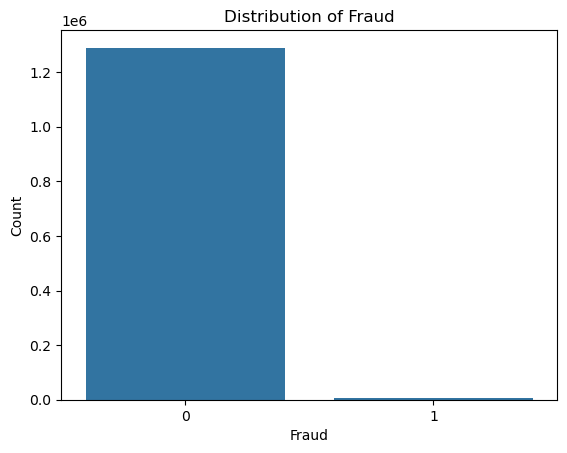

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
fraud_counts=train_data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()
# this code will produce a bar chart that visually represents the number of fraudulent versus legitimate transactions in your dataset, 
# allowing you to easily assess the balance (or imbalance) between the two classes.


In [25]:
fraud=train_data[train_data["is_fraud"]==1]
not_fraud=train_data[train_data["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])
# this code will output the number of fraudulent and non-fraudulent transactions in your dataset, 
# helping you understand the class distribution and potential class imbalance in your credit card fraud detection task.

7506
1289169


In [27]:
not_fraud=not_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,not_fraud])

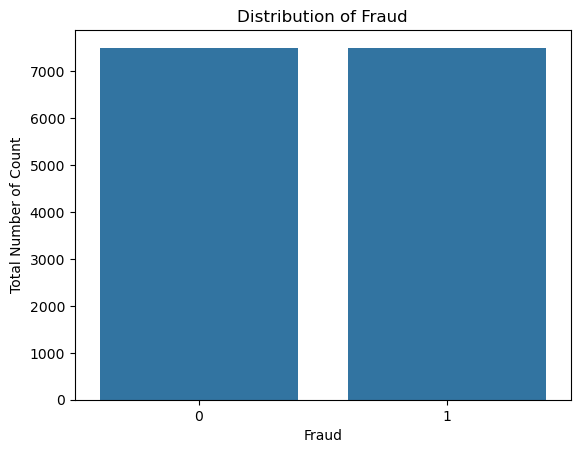

In [37]:
fraud_counts=data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Total Number of Count')
plt.show()
# This code visualizes the distribution of fraudulent and legitimate transactions in your dataset using a bar plot. 
# It counts the occurrences of each unique value in the is_fraud column (0 for legitimate and 1 for fraudulent transactions) 
# and then creates a bar plot with these counts. The plot is labeled with a title "Distribution of 
# Fraud" and axes labeled "Fraud" and "Total Number of Count," making it easy to assess the balance between the two classes. 
# Finally, it displays the plot to provide a clear visual representation of the transaction distribution.

In [39]:
unused_cols=['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant']
data.drop(columns=unused_cols,inplace=True)

In [41]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)
# This code processes the trans_date_trans_time column in the data DataFrame by converting it into a datetime format. 
# It then extracts specific components from the datetime, creating new columns for the day, month, year, hour, and minute 
# of each transaction. Finally, it drops the original trans_date_trans_time column, leaving only the newly created temporal features. 
# This transformation helps in analyzing the temporal aspects of transactions, which can be useful for detecting patterns related to fraud.

In [45]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
data['cc_num']=encoder.fit_transform(data['cc_num'])

In [47]:
data.head(2)

,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
2449,121,4,281.06,28611,35.9946,-81.7266,885,36.430124,-81.179483,1,2,1,2019,1,6
2472,305,2,11.52,78208,29.4400,-98.4590,1595797,29.819364,-99.142791,1,2,1,2019,1,47


In [49]:
scaler=StandardScaler()
data['amt']=scaler.fit_transform(data[['amt']])
data['zip']=scaler.fit_transform(data[['zip']])
data['city_pop']=scaler.fit_transform(data[['city_pop']])
data['cc_num']=encoder.fit_transform(data['cc_num'])

In [51]:
X=data.drop('is_fraud',axis=1)
y=data['is_fraud']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=0)

In [57]:
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

In [84]:
print('Accuracy:',accuracy_score(y_test, y_pred))

Accuracy: 0.9508992292320868


In [86]:
print('Precision:',precision_score(y_test, y_pred))


Precision: 0.9594117647058824


In [88]:
print('Recall:', recall_score(y_test, y_pred))


Recall: 0.9405997693194925


In [90]:
print('F1 score:',f1_score(y_test, y_pred))

F1 score: 0.9499126383226558


Text(0.5, 1.0, 'Confusion Matrix Using RandomForest')

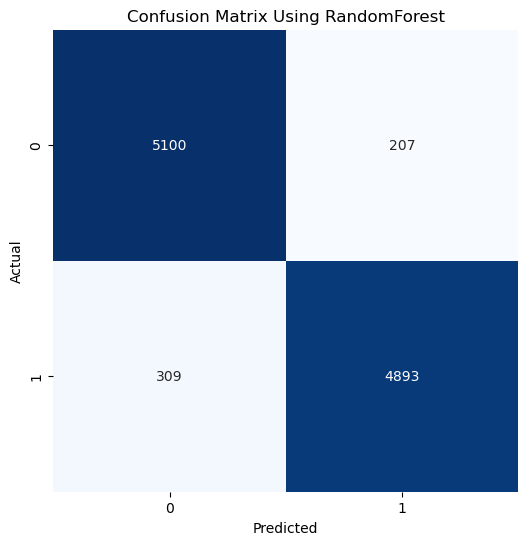

In [92]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using RandomForest')